# Project: Investigate a Dataset - [European Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier.
it contain the following :
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches


### Question(s) for Analysis
> **Q1 : What's the season that have the most played matches?**

> **Q2 : What's the league that have the most scored goals ?**

> **Q3 : What top 5 teams scored most goals ?**

> **Q4 : What most fans choose to bet odds (Home Team ,Away Team,Draw) in all leagues ?**

> **Q5 : What's winning parcentage for Away Teams?**

> **Q6 : What's the most teams play speed type use ?**

> **Q7 : What's correlation of Slow play speed by years ?** 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


# Load Data

In [2]:
cty = pd.read_csv('Database_Soccer\Country.csv')
leg = pd.read_csv('Database_Soccer\League.csv')
mth = pd.read_csv('Database_Soccer\Match.csv')
ply = pd.read_csv('Database_Soccer\Player.csv')
ply_att = pd.read_csv('Database_Soccer\Player_Attributes.csv')
sqs = pd.read_csv('Database_Soccer\sqlite_sequence.csv')
tm = pd.read_csv('Database_Soccer\Team.csv')
tm_att = pd.read_csv('Database_Soccer\Team_Attributes.csv')

# Check Data

### Check Country Database

In [3]:
cty.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
cty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [5]:
cty.duplicated().sum()

0

### Check League Database

In [6]:
leg.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
leg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [8]:
leg.duplicated().sum()

0

**Merge Country and League name**

In [9]:
cty.rename(columns={'name':'country_name'},inplace=True)
leg.rename(columns={'name':'leauge_name'},inplace=True)

In [10]:
merge_country_league=pd.merge(cty,leg,on='id')
merge_country_league.drop(columns='id',inplace=True)
merge_country_league=merge_country_league[['country_id','country_name','leauge_name']]
merge_country_league=merge_country_league.rename(columns={'leauge_name':'league_name'})
merge_country_league

,country_id,country_name,league_name
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


### Check Match Database

In [11]:
mth

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [13]:
mth.duplicated().sum()

0

In [14]:
mth.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [15]:
mth.columns.to_list()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

> ***Clean Match Database***

No need for the following columns

**Player Location on pitch**

 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11'
 
 **Match Status**
 
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession'
 
**Bet odds for nine Companies**
> I don't need for all , i choose the most comman bet company bet360

B365H = Bet365 home win odds

B365D = Bet365 draw odds

B365A = Bet365 away win odds

> for more explanation for the betting columns of the database: http://www.football-data.co.uk/notes.txt

 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'SJH',
 'SJD',
 'SJA',
 'VCH',
 'VCD',
 'VCA',
 'GBH',
 'GBD',
 'GBA',
 'BSH',
 'BSD',
 'BSA'

In [16]:
mth.drop(columns=['home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'SJH',
 'SJD',
 'SJA',
 'VCH',
 'VCD',
 'VCA',
 'GBH',
 'GBD',
 'GBA',
 'BSH',
 'BSD',
 'BSA'],inplace=True)

**Merge match table with country and league name**

In [17]:
merge_match_league=pd.merge(merge_country_league,mth,on='country_id')
merge_match_league.drop(columns=['country_id','date','id','match_api_id'],inplace=True)
merge_match_league

,country_name,league_name,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
0,Belgium,Belgium Jupiler League,1,2008/2009,1,9987,9993,1,1,1.73,3.40,5.00
1,Belgium,Belgium Jupiler League,1,2008/2009,1,10000,9994,0,0,1.95,3.20,3.60
2,Belgium,Belgium Jupiler League,1,2008/2009,1,9984,8635,0,3,2.38,3.30,2.75
3,Belgium,Belgium Jupiler League,1,2008/2009,1,9991,9998,5,0,1.44,3.75,7.50
4,Belgium,Belgium Jupiler League,1,2008/2009,1,7947,9985,1,3,5.00,3.50,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,24558,2015/2016,9,10190,10191,1,0,NaN,NaN,NaN
25975,Switzerland,Switzerland Super League,24558,2015/2016,9,9824,10199,1,2,NaN,NaN,NaN
25976,Switzerland,Switzerland Super League,24558,2015/2016,9,9956,10179,2,0,NaN,NaN,NaN
25977,Switzerland,Switzerland Super League,24558,2015/2016,9,7896,10243,0,0,NaN,NaN,NaN


> ***Check Team Database***

In [18]:
tm.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [19]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


**Merge Team Names with Match Table**

In [20]:
tm.drop(columns=['id','team_short_name','team_fifa_api_id'],inplace=True)

In [21]:
tmhome=tm.rename(columns={'team_api_id':'home_team_api_id','team_long_name':'home_team_name'})
tmway=tm.rename(columns={'team_api_id':'away_team_api_id','team_long_name':'away_team_name'})

In [22]:
merge_team_match=pd.merge(tmway,merge_match_league,on='away_team_api_id')
merge_team_match=pd.merge(tmhome,merge_team_match,on='home_team_api_id')
merge_team_match.drop(columns=['home_team_api_id','away_team_api_id'],inplace=True)
merge_team_match

,home_team_name,away_team_name,country_name,league_name,league_id,season,stage,home_team_goal,away_team_goal,B365H,B365D,B365A
0,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2008/2009,1,1,1,1.73,3.40,5.00
1,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2009/2010,5,1,1,1.75,3.50,4.33
2,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2010/2011,1,2,1,1.91,3.30,3.75
3,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2011/2012,1,3,1,1.44,4.33,7.00
4,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2012/2013,11,3,0,1.50,4.00,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,Lugano,FC Zürich,Switzerland,Switzerland Super League,24558,2015/2016,9,0,0,NaN,NaN,NaN
25975,Lugano,FC St. Gallen,Switzerland,Switzerland Super League,24558,2015/2016,12,3,1,NaN,NaN,NaN
25976,Lugano,FC St. Gallen,Switzerland,Switzerland Super League,24558,2015/2016,36,3,0,NaN,NaN,NaN
25977,Lugano,FC Thun,Switzerland,Switzerland Super League,24558,2015/2016,2,2,3,NaN,NaN,NaN


> **Clean New Match database**

In [23]:
merge_team_match.isnull().sum()

home_team_name       0
away_team_name       0
country_name         0
league_name          0
league_id            0
season               0
stage                0
home_team_goal       0
away_team_goal       0
B365H             3387
B365D             3387
B365A             3387
dtype: int64

In [24]:
merge_team_match.fillna(merge_team_match.mean(numeric_only=True),inplace=True)
merge_team_match

,home_team_name,away_team_name,country_name,league_name,league_id,season,stage,home_team_goal,away_team_goal,B365H,B365D,B365A
0,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2008/2009,1,1,1,1.730000,3.400000,5.000000
1,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2009/2010,5,1,1,1.750000,3.500000,4.330000
2,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2010/2011,1,2,1,1.910000,3.300000,3.750000
3,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2011/2012,1,3,1,1.440000,4.330000,7.000000
4,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,1,2012/2013,11,3,0,1.500000,4.000000,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,Lugano,FC Zürich,Switzerland,Switzerland Super League,24558,2015/2016,9,0,0,2.628818,3.839684,4.662222
25975,Lugano,FC St. Gallen,Switzerland,Switzerland Super League,24558,2015/2016,12,3,1,2.628818,3.839684,4.662222
25976,Lugano,FC St. Gallen,Switzerland,Switzerland Super League,24558,2015/2016,36,3,0,2.628818,3.839684,4.662222
25977,Lugano,FC Thun,Switzerland,Switzerland Super League,24558,2015/2016,2,2,3,2.628818,3.839684,4.662222


***Get Match Result***

In [25]:
def match_result(raw):
### Get Match result 
    home_goals=raw['home_team_goal']
    away_goals=raw['away_team_goal']
    if home_goals > away_goals:
        return 'home_win'
    elif home_goals == away_goals:
        return 'draw'
    else :
        return 'away_win'

In [26]:
merge_team_match['match_result']=merge_team_match.apply(match_result,axis=1)
merge_team_match['match_result']

0            draw
1            draw
2        home_win
3        home_win
4        home_win
           ...   
25974        draw
25975    home_win
25976    home_win
25977    away_win
25978    home_win
Name: match_result, Length: 25979, dtype: object

> ***Check Teams attributes Database***

In [27]:
tm_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [28]:
tm_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

**Clean Team attributes Data**

In [29]:
tm_att.fillna(tm_att.mean(numeric_only=True),inplace=True)
tm_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            1458 non-null   float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

**Merge Team names with thier attributes and cleaning data**

In [30]:
tm_att=pd.merge(tm,tm_att)
tm_att.drop(columns=['team_api_id','id','team_fifa_api_id'],inplace=True)

In [31]:
tm_att_year = pd.DatetimeIndex(tm_att['date']).year
tm_att['year']=tm_att_year
tm_att.drop(columns=['date'],inplace=True)

In [32]:
tm_att.duplicated().sum()

8

In [33]:
tm_att.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : What's the season that have the most played matches?

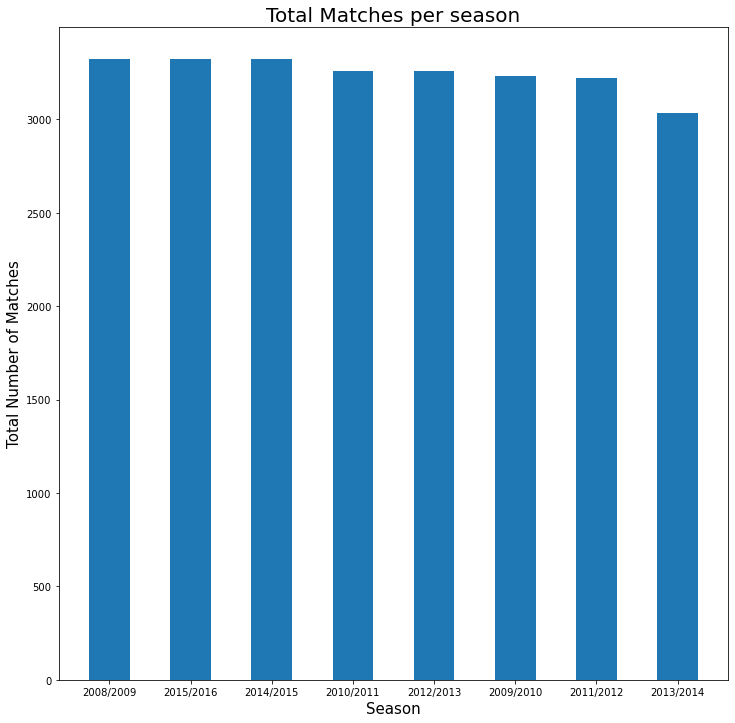

In [34]:
season_matches= merge_team_match['season'].value_counts()
label= season_matches.keys()
sizes= season_matches[:]
width = 0.5
plt.subplots(figsize=(12,12))
plt.bar(label,sizes,width)
plt.title('Total Matches per season',fontsize=20)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Total Number of Matches',fontsize=15)
plt.show()

In [35]:
season_matches

2008/2009    3326
2015/2016    3326
2014/2015    3325
2010/2011    3260
2012/2013    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

> From the database, I found that most seasons with the most played matches are seasons (2008/2009, 2015/2016)
Among them, the total matches for each season decreased due to many reasons (cancellation of tournaments, political issues, ...etc)

### Question 2 : What's the league that have the most scored goals ? 

In [36]:
total_goals_league=merge_team_match.groupby('league_name')['home_team_goal'].count()+merge_team_match.groupby('league_name')['away_team_goal'].count()
total_goals_league

league_name
Belgium Jupiler League      3456
England Premier League      6080
France Ligue 1              6080
Germany 1. Bundesliga       4896
Italy Serie A               6034
Netherlands Eredivisie      4896
Poland Ekstraklasa          3840
Portugal Liga ZON Sagres    4104
Scotland Premier League     3648
Spain LIGA BBVA             6080
Switzerland Super League    2844
dtype: int64

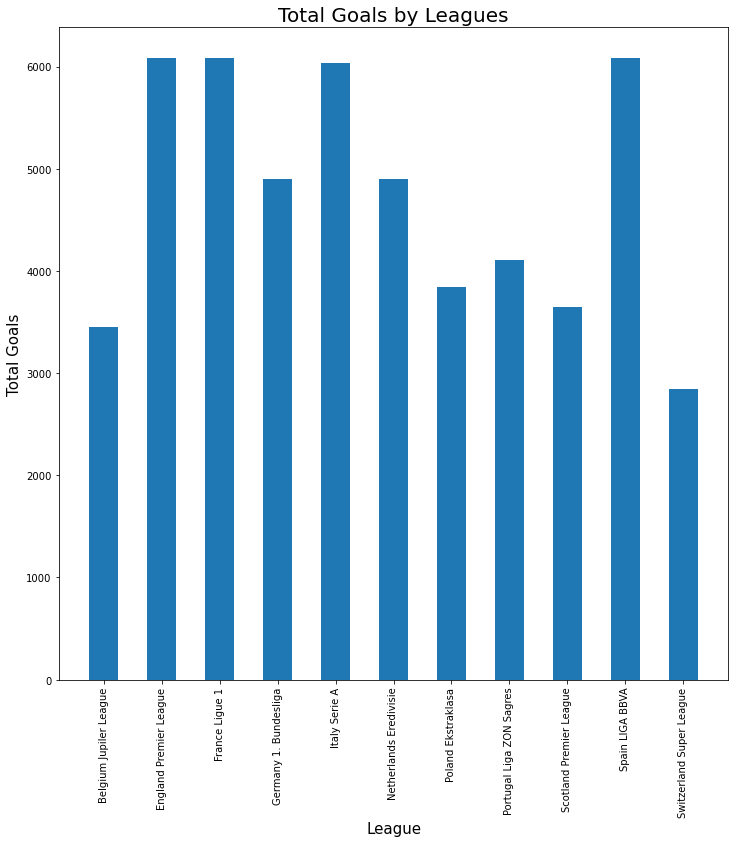

In [37]:
label= total_goals_league.keys()
sizes= total_goals_league[:]
width = 0.5
plt.subplots(figsize=(12,12))
plt.bar(label,sizes,width)
plt.title('Total Goals by Leagues',fontsize=20)
plt.xlabel('League',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Goals',fontsize=15)
plt.show()

 The leagues with the most goals are (Premier League, Ligue 1, Spain LIGA BBVA), and this positively affected the strength of those leagues

### Question 3 : What top 5 teams scored most goals ?

In [38]:
total_team_goals=merge_team_match.groupby('home_team_name')['home_team_goal'].sum()+merge_team_match.groupby('away_team_name')['away_team_goal'].sum()

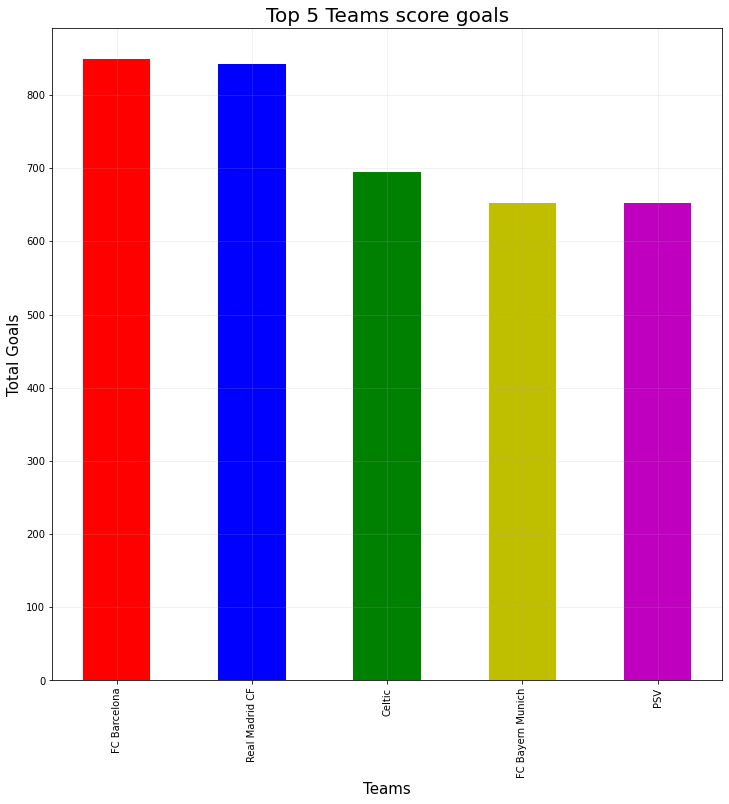

In [39]:
Top_5Goals = total_team_goals.nlargest(5)
label= Top_5Goals.keys()
sizes= Top_5Goals[:]
width = 0.5
plt.subplots(figsize=(12,12))
plt.bar(label,sizes,width,color=['r','b','g','y','m'])
plt.title('Top 5 Teams score goals',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Goals',fontsize=15)
plt.grid(alpha=0.2)
plt.show()

In [40]:
Top_5Goals

home_team_name
FC Barcelona        849
Real Madrid CF      843
Celtic              695
FC Bayern Munich    653
PSV                 652
dtype: int64

### Question 4 : What most fans choose to bet odds (Home Team ,Away Team,Draw) in all leagues ?

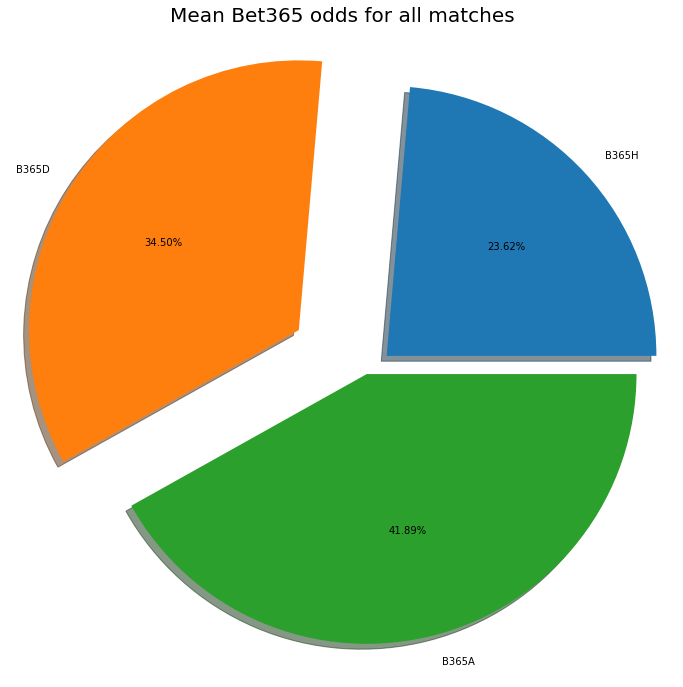

In [41]:
odds=merge_team_match.loc[:,'B365H':'B365A'].mean()
x= odds.keys()
y= odds[:]
explode = (0.1,0.3,0)
plt.subplots(figsize=(12,12))
plt.pie(y,labels=x,explode=explode,shadow=True,autopct='%.2f%%')
plt.title('Mean Bet365 odds for all matches',fontsize=20)
plt.axis('equal')
plt.show()

> Yes, of coarse.
360bets effected by the location of match and teams supporters , I found that Away teams supporters increased in bet odds by almost double bet odds rather than Home teams supporters.

> **Home teams are more Laky to score on their home rather than away** 

### Question 5 : What's winning parcentage for Away Teams?

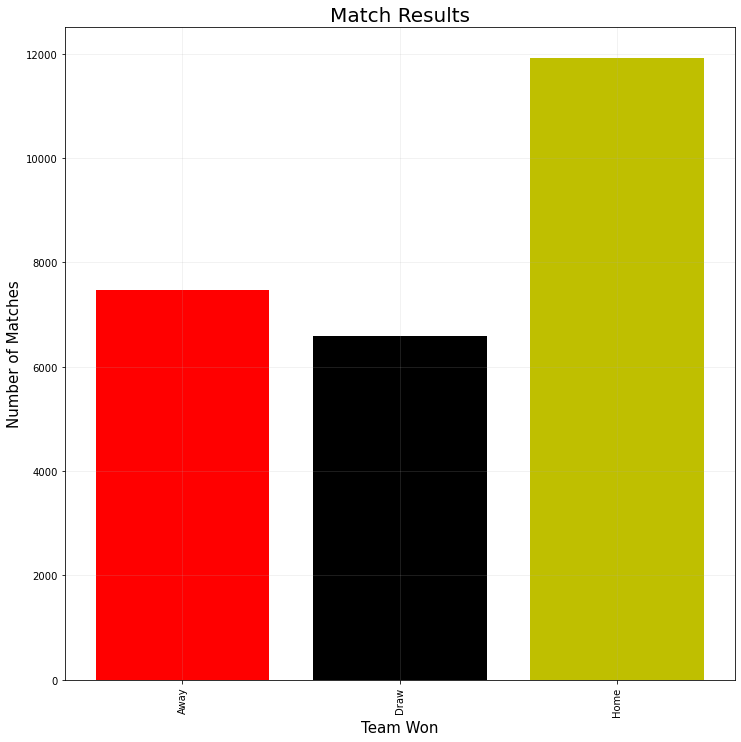

In [42]:
winning_effect=merge_team_match.groupby('match_result')['league_name'].count()
plt.subplots(figsize=(12,12));
plt.bar(winning_effect.keys(),winning_effect[:],color=['r','k','y']);
plt.title('Match Results',fontsize=20)
plt.xlabel('Team Won',fontsize=15)
values=['Away','Draw','Home']
plt.xticks(winning_effect.keys(),values,rotation=90)
plt.ylabel('Number of Matches',fontsize=15)
plt.grid(alpha=0.2)
plt.show()

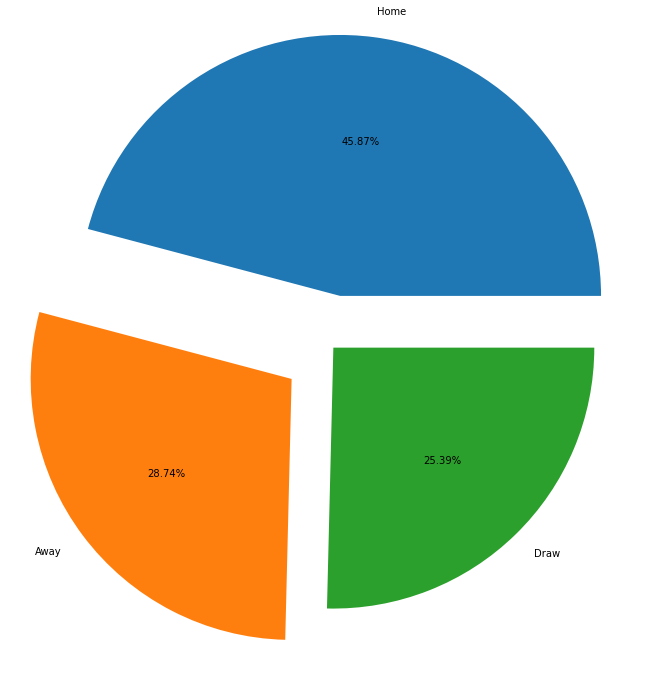

In [43]:
total_count = merge_team_match.groupby('match_result')['league_name'].count().sum()
home_count = merge_team_match.query('match_result == "home_win"')['league_name'].count()
away_count = merge_team_match.query('match_result == "away_win"')['league_name'].count()
draw_count = merge_team_match.query('match_result == "draw"')['league_name'].count()
home_percentage=home_count/total_count *100
away_percentage=away_count/total_count *100
draw_percentage=draw_count/total_count *100
plt.subplots(figsize=(12,12));
plt.pie([home_percentage,away_percentage,draw_percentage],labels=['Home','Away','Draw'],explode=[0.2,0.2,0],autopct='%0.2f%%');

By Parcentage 45.87 % home team win , playing home had a big effect in winning match of course and i think this belong to their fans.

### Question 6 : What's the most teams play speed type use ? 

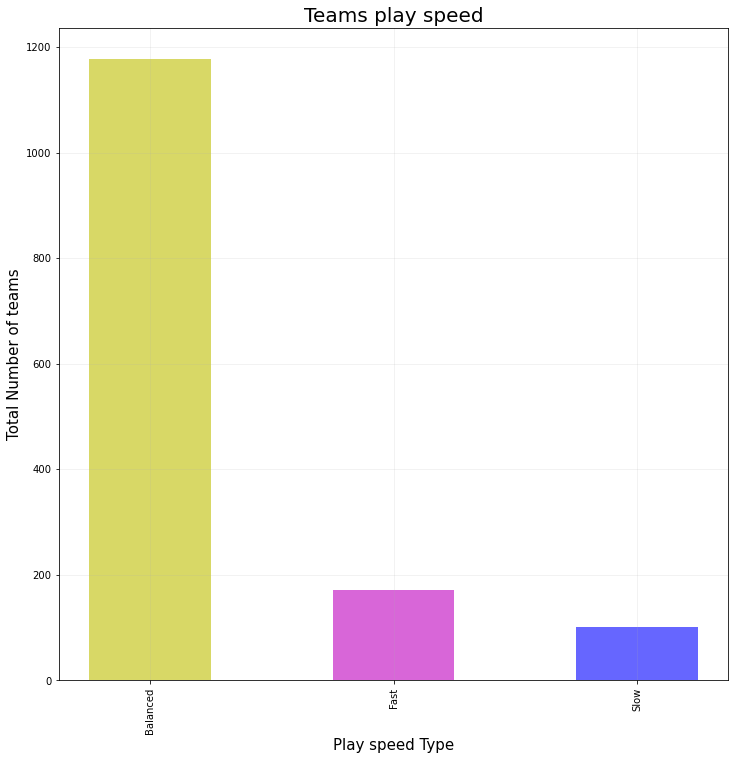

In [44]:
plyspeed=tm_att.groupby('buildUpPlaySpeedClass')['team_long_name'].count()
label = plyspeed.keys()
plt.subplots(figsize=(12,12));
plt.bar(label,plyspeed[:],width=0.5,alpha=0.6,color=['y','m','b']);
plt.title('Teams play speed',fontsize=20)
plt.xlabel('Play speed Type',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Number of teams',fontsize=15)
plt.grid(alpha=0.2)
plt.show()

### Question 7 : What's correlation of Slow play speed by years ? 

In [45]:
speed_y=tm_att.loc[:,'buildUpPlaySpeedClass':'year']
speed_y.columns

Index(['buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'year'],
      dtype='object')

In [46]:
speed_y.drop(columns=['buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass'],inplace=True)

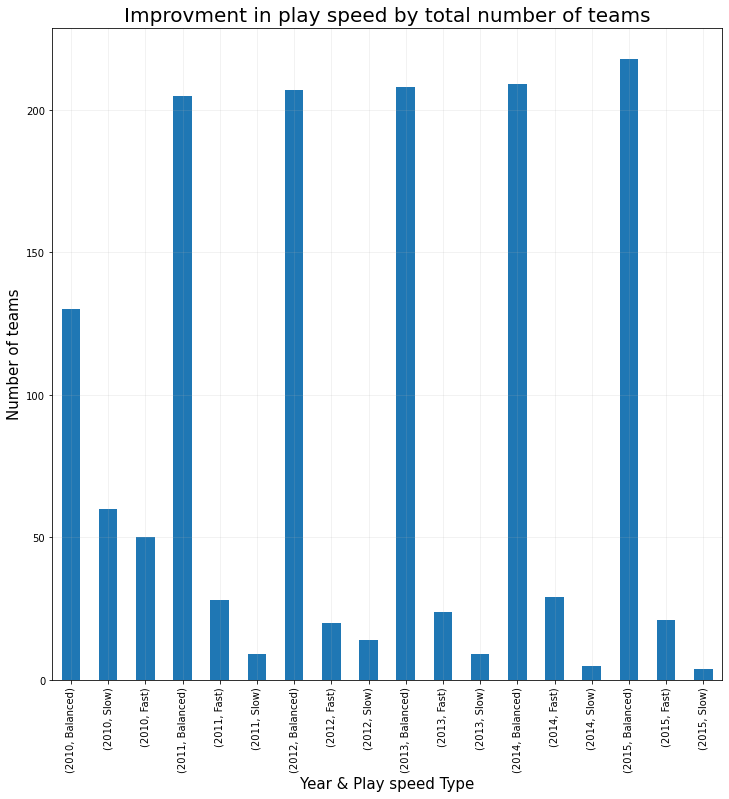

In [47]:
plt.subplots(figsize=(12,12));
speed_y.groupby('year')['buildUpPlaySpeedClass'].value_counts().plot(kind='bar',stacked=True);
plt.title('Improvment in play speed by total number of teams',fontsize=20)
plt.ylabel('Number of teams',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Year & Play speed Type',fontsize=15)
plt.grid(alpha=0.2)
plt.show()

<a id='conclusions'></a>
## Conclusions
***Q1 : What's the season that have the most played matches?***

> 2008/2009 , 2015/2016

***Q2 : What's the league that have the most scored goals ?***

> Premier League, Ligue 1, Spain LIGA BBVA

***Q3 : What top 5 teams scored most goals ?***

>FC Barcelona ---> 849 Goals

>Real Madrid CF ---> 843 Goals

>Celtic ---> 695 Goals

>FC Bayern Munich ---> 653 Goals

>PSV ---> 652 Goals

***Q4 : What most fans choose to bet odds (Home Team ,Away Team,Draw) in all leagues ?***

> Home Team

***Q5 : What's winning parcentage for Away Teams?***

>28.74%

***Q6 : What's the most teams play speed type use ?***

>Balanced

***Q7 : What's correlation of Slow play speed by years ?*** 

> Negative correlation
